In [330]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from matplotlib import pyplot as plt

In [331]:
df = pd.read_csv('vehicles.csv')

In [332]:
df.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


# Подготовка данных

### Дропаем явно бесполезные колонки

In [333]:
df = df.drop(['id', 'url', 'region_url', 'image_url', 'description', 'county', 'VIN', 'lat', 'long', 'title_status'], axis=1)

### Мы также не будем использовать название модели автомобиля, данные об округе (штат оставим) и дату выставления (везде с апреля по май 2021)

In [334]:
df = df.drop(['region', 'posting_date'], axis=1)


### Посмотрим на процент заполнения колонок

In [335]:
df.isna().sum() / df.shape[0] * 100.00

price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
transmission     0.598763
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

### Попытаемся заполнить недостающие данные, будем изучать самые частые значения и смотреть на гистограммы

In [336]:
col = 'condition'
res = df[col].value_counts().head(10)
res.apply(lambda x: str(round(x / 426880, 2)))

condition
good         0.28
excellent    0.24
like new     0.05
fair         0.02
new           0.0
salvage       0.0
Name: count, dtype: object

In [337]:
col = 'transmission'
res = df[col].value_counts().head(10)
res.apply(lambda x: str(round(x / 426880, 2)))

transmission
automatic    0.79
other        0.15
manual       0.06
Name: count, dtype: object

In [338]:
col = 'transmission'
res = df[col].value_counts().head(10)
res.apply(lambda x: str(round(x / 426880, 2)))

transmission
automatic    0.79
other        0.15
manual       0.06
Name: count, dtype: object

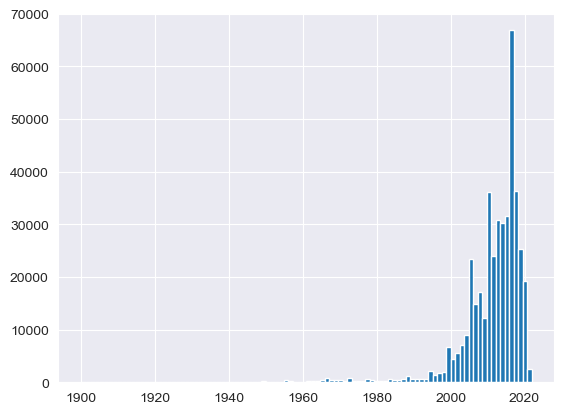

In [339]:
col = 'year'
res = df[col].value_counts().head(10)
res.apply(lambda x: str(round(x / 426880, 2)))
df[col].hist(bins=100)
plt.show()

In [340]:
col = 'size'
res = df[col].value_counts().head(10)
res.apply(lambda x: str(round(x / 426880, 2)))

size
full-size      0.15
mid-size       0.08
compact        0.05
sub-compact    0.01
Name: count, dtype: object

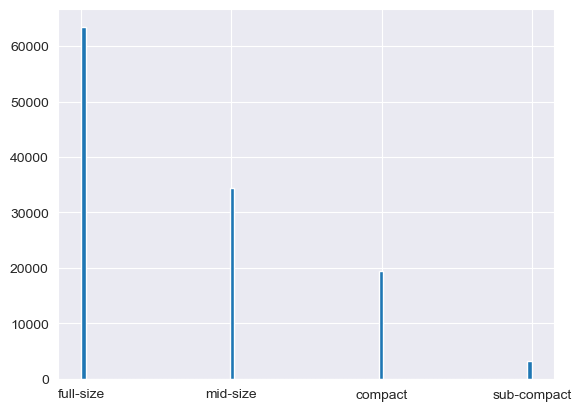

0    full-size
Name: size, dtype: object

In [341]:
df[col].hist(bins=100)
plt.show()
df[col].mode()

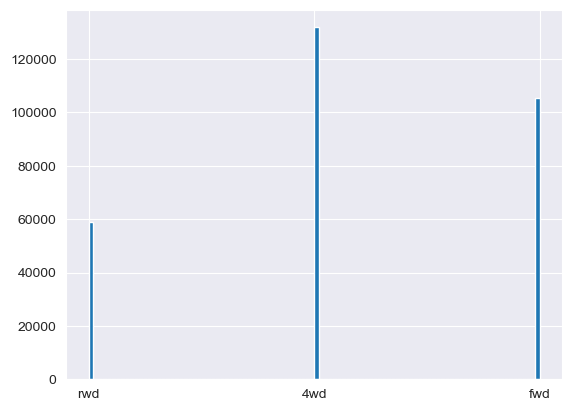

In [342]:
col = 'drive'
res = df[col].value_counts().head(10)
res.apply(lambda x: str(round(x / 426880, 2)))
df[col].hist(bins=100)
plt.show()

In [343]:
df[col].mode()

0    4wd
Name: drive, dtype: object

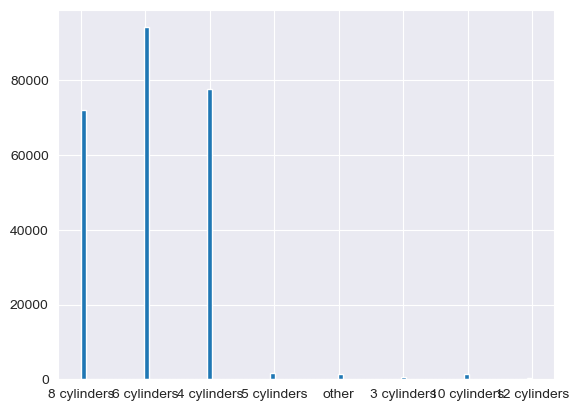

In [344]:
col = 'cylinders'
res = df[col].value_counts().head(10)
res.apply(lambda x: str(round(x / 426880, 2)))
df[col].hist(bins=100)
plt.show()

In [345]:
col = 'odometer'
df[col].mean(), df[col].median()

(98043.33144290854, 85548.0)

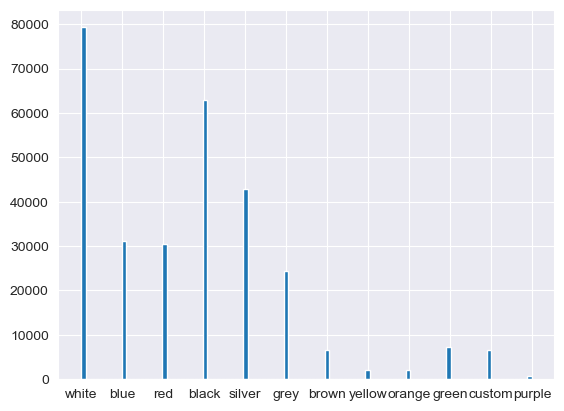

In [346]:
col = 'paint_color'
res = df[col].value_counts().head(10)
res.apply(lambda x: str(round(x / 426880, 2)))
df[col].hist(bins=100)
plt.show()

In [347]:
col = 'type'
res = df[col].value_counts().head(10)
res.apply(lambda x: str(round(x / 426880, 2)))

type
sedan           0.2
SUV            0.18
pickup          0.1
truck          0.08
other          0.05
coupe          0.04
hatchback      0.04
wagon          0.03
van            0.02
convertible    0.02
Name: count, dtype: object

### Заменим пропущенные condition на good

In [348]:
df['condition'].fillna('good', inplace=True)

### Заменим пропущенные transmission на automatic

In [349]:
df['condition'].fillna('automatic', inplace=True)

### Перейдем к году, среднее значение в данном случае бессмысленно, так что возьмем самое частое значение

In [350]:
df['year'].fillna(2017, inplace=True)

### Неясно как заменить значения в size, так как пропусков много, дропать строки жалко, а оставшиеся заполнены неравномерно, избавимся от этой колонки. Аналогичная проблема с drive и cylinders.

In [351]:
df = df.drop('size', axis=1)
#df = df.drop('drive', axis=1)
#df = df.drop('cylinders', axis=1)

### Для пробега медиана и среднее отличаются не сильно, значит распределение хорошее, заменим на медиану

In [352]:
df['odometer'].fillna(df['odometer'].median(), inplace=True)

### Заменим цвет на наиболее часто встречающийся белый

In [353]:
#df['paint_color'].fillna('white', inplace=True)
df=df.drop('paint_color', axis=1)

## Посмотрим чего удалось добиться

In [354]:
df.isna().sum() / df.shape[0] * 100.00

price            0.000000
year             0.000000
manufacturer     4.133714
model            1.236179
condition        0.000000
cylinders       41.622470
fuel             0.705819
odometer         0.000000
transmission     0.598763
drive           30.586347
type            21.752717
state            0.000000
dtype: float64

## Далее дропнем строки с NaN

In [355]:
df.replace(0, np.nan, inplace=True)
df = df.dropna()
df.tail()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
426860,39990.0,2017.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,41664.0,automatic,4wd,other,wy
426866,32990.0,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,automatic,rwd,other,wy
426874,33590.0,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,automatic,rwd,sedan,wy
426875,23590.0,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,other,fwd,sedan,wy
426878,28990.0,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,other,fwd,sedan,wy


# Убедимся что с типами все в порядке

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170309 entries, 31 to 426878
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         170309 non-null  float64
 1   year          170309 non-null  float64
 2   manufacturer  170309 non-null  object 
 3   model         170309 non-null  object 
 4   condition     170309 non-null  object 
 5   cylinders     170309 non-null  object 
 6   fuel          170309 non-null  object 
 7   odometer      170309 non-null  float64
 8   transmission  170309 non-null  object 
 9   drive         170309 non-null  object 
 10  type          170309 non-null  object 
 11  state         170309 non-null  object 
dtypes: float64(3), object(9)
memory usage: 16.9+ MB


In [357]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df['price'] = df['price'].astype(float)
df['odometer'] = df['odometer'].astype(float)
df.loc[:, 'price'] = ss.fit_transform(df.loc[:, 'price'].values.reshape(-1, 1))
df.loc[:, 'odometer'] = ss.fit_transform(df.loc[:, 'odometer'].values.reshape(-1, 1))
df.tail()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
426860,-0.000871,2017.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,-0.380279,automatic,4wd,other,wy
426866,-0.001611,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,-0.295180,automatic,rwd,other,wy
426874,-0.001548,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,-0.446478,automatic,rwd,sedan,wy
426875,-0.002604,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,-0.437863,other,fwd,sedan,wy
426878,-0.002034,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,-0.450761,other,fwd,sedan,wy


## Закодируем категориальные переменные

In [358]:
import category_encoders as ce

encoder = ce.CountEncoder()
df_num = encoder.fit_transform(df)
df_num.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
31,-0.003512,2013.0,29834,252,56814,62923,153944,0.146474,143441,35438,22695,2044
32,-0.002139,2012.0,6910,165,95620,48537,153944,-0.215352,16059,77114,19301,2044
33,-0.001442,2016.0,24269,319,95620,62923,153944,-0.454501,16059,77114,19301,2044
34,-0.001399,2019.0,15326,1199,56814,62923,153944,-0.372128,143441,77114,22695,2044
35,-0.001928,2016.0,24269,282,95620,62923,153944,-0.528917,16059,77114,19301,2044


## Посмотрим как коррелируют наши величины

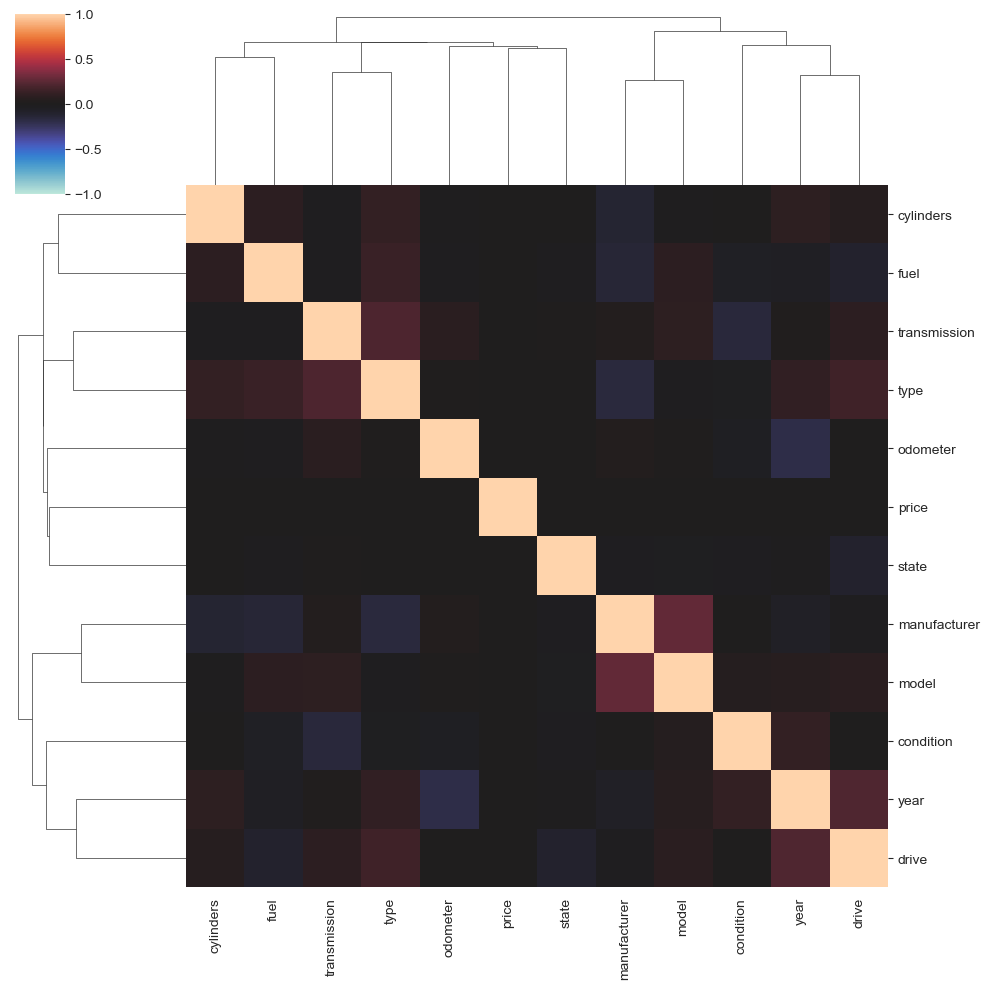

In [359]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        #select_dtypes([np.number])
        df.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )


corrplot(df_num, annot=None)

### Видим что цена особо ни от чего явно не зависит

In [360]:
import os
np.set_printoptions(precision=4)

import catboost
print(catboost.__version__)

1.2


In [361]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
31,-0.003512,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,0.146474,automatic,rwd,truck,al
32,-0.002139,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,-0.215352,other,4wd,pickup,al
33,-0.001442,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,-0.454501,other,4wd,pickup,al
34,-0.001399,2019.0,toyota,tacoma,excellent,6 cylinders,gas,-0.372128,automatic,4wd,truck,al
35,-0.001928,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,-0.528917,other,4wd,pickup,al


In [362]:
target = 'price'
features = list(df.columns)
features.remove(target)
features

['year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'transmission',
 'drive',
 'type',
 'state']

In [363]:
df['year'] = df['year'].astype(str)

In [364]:
X = df[features]
y = df[[target]]

In [365]:
from sklearn.model_selection import train_test_split
from catboost import Pool
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.reshape(-1), train_size=0.8, shuffle=True)

ss = StandardScaler()



cat_features = list(range(0, X.shape[1]))
cat_features.remove(df.columns.get_loc('odometer') - 1)

train_pool = Pool(
    data = X_train,
    label = y_train,
    cat_features = cat_features
)

test_pool = Pool(
    data = X_test,
    label = y_test,
    cat_features = cat_features
)

In [366]:
from catboost import CatBoostRegressor
from ipywidgets import Layout
from catboost import MetricVisualizer

In [367]:
model = CatBoostRegressor(iterations=1000,
                          learning_rate=0.5,
                          cat_features=cat_features,
                          loss_function='RMSE',
                          task_type='GPU',
                          early_stopping_rounds=50,
                          max_depth=8,
)

In [368]:
model.fit(train_pool,
          eval_set=test_pool,
          verbose=50,
          plot=False,
)

0:	learn: 1.1117658	test: 0.0715499	best: 0.0715499 (0)	total: 66.9ms	remaining: 1m 6s
50:	learn: 0.6885272	test: 0.2612123	best: 0.0715499 (0)	total: 2.3s	remaining: 42.8s
bestTest = 0.07154987529
bestIteration = 0
Shrink model to first 1 iterations.


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170309 entries, 31 to 426878
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         170309 non-null  float64
 1   year          170309 non-null  object 
 2   manufacturer  170309 non-null  object 
 3   model         170309 non-null  object 
 4   condition     170309 non-null  object 
 5   cylinders     170309 non-null  object 
 6   fuel          170309 non-null  object 
 7   odometer      170309 non-null  float64
 8   transmission  170309 non-null  object 
 9   drive         170309 non-null  object 
 10  type          170309 non-null  object 
 11  state         170309 non-null  object 
dtypes: float64(2), object(10)
memory usage: 16.9+ MB
